In [ ]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")


In [5]:
import pandas as pd

file_path = r"C:\projects\New folder\delhivery_data.csv"   
df = pd.read_csv(file_path)

df.head()



,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
# Step 2: Basic info
print("Shape (rows, columns):", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())


Shape (rows, columns): (144867, 24)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144

In [7]:
# Step 3: Fix column names (if needed)
df.columns = df.columns.str.strip()  # نشيل أي spaces زيادة

# لو في typo في اسم العمود
if "destination_cente" in df.columns:
    df = df.rename(columns={"destination_cente": "destination_center"})

print(df.columns)


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')


In [8]:
# Step 4: Convert time columns to datetime
time_cols = ["trip_creation_time", "od_start_time", "od_end_time", "cutoff_timestamp"]

for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")  # اللي مش بيتحول يبقى NaT

df[time_cols].head()


,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,NaT
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55


In [9]:
missing_cutoff = df[df["is_cutoff"] == 1]["cutoff_timestamp"].isna().sum()
total_cutoffs = df[df["is_cutoff"] == 1].shape[0]

print("Missing cutoff timestamps in cutoff=1 rows:", missing_cutoff)
print("Total cutoff=1 rows:", total_cutoffs)


Missing cutoff timestamps in cutoff=1 rows: 588
Total cutoff=1 rows: 118749


In [10]:
# Remove rows where is_cutoff == 1 BUT cutoff_timestamp is missing
df = df[~((df["is_cutoff"] == 1) & (df["cutoff_timestamp"].isna()))]

print("Remaining rows:", df.shape[0])


Remaining rows: 144279


In [11]:
# Step 5: Convert numeric columns
numeric_cols = [
    "start_scan_to_end_scan",
    "cutoff_factor",
    "actual_distance_to_destination",
    "actual_time",
    "osrm_time",
    "osrm_distance",
    "factor",
    "segment_actual_time",
    "segment_osrm_time",
    "segment_osrm_distance",
    "segment_factor"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144279.0,964.580778,1037.694731,20.000000,162.000000,453.000000,1645.000000,7898.000000
cutoff_factor,144279.0,233.696830,345.187416,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144279.0,234.837513,345.425082,9.000045,23.376109,66.176045,286.927928,1927.447705
actual_time,144279.0,418.172499,598.818354,9.000000,52.000000,132.000000,516.000000,4532.000000
osrm_time,144279.0,214.542303,308.400374,6.000000,27.000000,65.000000,259.000000,1686.000000
osrm_distance,144279.0,285.693451,421.652950,9.008200,29.986100,78.885800,346.336150,2326.199100
factor,144279.0,2.118673,1.716485,0.144000,1.604348,1.857143,2.211677,77.387097
segment_actual_time,144279.0,36.099398,53.303009,-244.000000,20.000000,28.000000,40.000000,3051.000000
segment_osrm_time,144279.0,18.490841,14.748935,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144279.0,22.816879,17.839060,0.000000,12.068350,23.513000,27.803650,2191.403700


In [12]:
# Step 6: Missing values percentage
missing_percent = df.isna().mean().sort_values(ascending=False) * 100
missing_percent


cutoff_timestamp                  1.969102
source_name                       0.200999
destination_name                  0.179513
data                              0.000000
cutoff_factor                     0.000000
segment_osrm_distance             0.000000
segment_osrm_time                 0.000000
segment_actual_time               0.000000
factor                            0.000000
osrm_distance                     0.000000
osrm_time                         0.000000
actual_time                       0.000000
actual_distance_to_destination    0.000000
is_cutoff                         0.000000
trip_creation_time                0.000000
start_scan_to_end_scan            0.000000
od_end_time                       0.000000
od_start_time                     0.000000
destination_center                0.000000
source_center                     0.000000
trip_uuid                         0.000000
route_type                        0.000000
route_schedule_uuid               0.000000
segment_fac

In [13]:
df = df[~((df["is_cutoff"] == 1) & (df["cutoff_timestamp"].isna()))]


In [14]:
df["source_name"] = df["source_name"].fillna("Unknown")
df["destination_name"] = df["destination_name"].fillna("Unknown")


In [15]:
df.isna().sum()


data                                 0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
trip_uuid                            0
source_center                        0
source_name                          0
destination_center                   0
destination_name                     0
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan               0
is_cutoff                            0
cutoff_factor                        0
cutoff_timestamp                  2841
actual_distance_to_destination       0
actual_time                          0
osrm_time                            0
osrm_distance                        0
factor                               0
segment_actual_time                  0
segment_osrm_time                    0
segment_osrm_distance                0
segment_factor                       0
dtype: int64

In [17]:
# Step 8: Remove duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print(f"Rows before dropping duplicates: {before}")
print(f"Rows after dropping duplicates: {after}")
print(f"Duplicates removed: {before - after}")


Rows before dropping duplicates: 144279
Rows after dropping duplicates: 144279
Duplicates removed: 0


In [18]:
# Step 9: Feature engineering

# 9.1: Trip duration in minutes
df["trip_duration_min"] = (
    (df["od_end_time"] - df["od_start_time"])
    .dt.total_seconds() / 60
)

# 9.2: Delay vs OSRM time (minutes)
if "actual_time" in df.columns and "osrm_time" in df.columns:
    df["delay_vs_osrm"] = df["actual_time"] - df["osrm_time"]

# 9.3: Distance difference (km)
if "actual_distance_to_destination" in df.columns and "osrm_distance" in df.columns:
    df["distance_diff"] = df["actual_distance_to_destination"] - df["osrm_distance"]

# 9.4: Speed in km/h
def compute_speed(row):
    dist = row.get("actual_distance_to_destination", np.nan)
    t = row.get("actual_time", np.nan)  # نفترض الوقت بالدقايق
    if pd.isna(dist) or pd.isna(t) or t <= 0:
        return np.nan
    hours = t / 60.0
    return dist / hours

df["speed_kmph"] = df.apply(compute_speed, axis=1)

df[["trip_duration_min", "delay_vs_osrm", "distance_diff", "speed_kmph"]].describe().T


,count,mean,std,min,25%,50%,75%,max
trip_duration_min,144279.0,965.076856,1037.694527,20.702813,162.794176,453.836867,1645.229124,7898.551955
delay_vs_osrm,144279.0,203.630196,304.085216,-110.000000,21.000000,65.000000,248.000000,3137.000000
distance_diff,144279.0,-50.855938,81.499425,-469.458566,-55.343306,-14.886650,-4.803932,0.230174
speed_kmph,144279.0,32.888934,10.355891,0.434947,26.686824,33.865202,39.158201,344.421390


In [20]:
# Step 10: Remove outliers using IQR

def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

cols_outliers = ["actual_time", "actual_distance_to_destination", "speed_kmph"]

for col in cols_outliers:
    if col in df.columns:
        before = df.shape[0]
        df = remove_outliers_iqr(df, col)
        after = df.shape[0]
        print(f"[{col}] rows removed as outliers: {before - after}")

df[cols_outliers].describe().T



[actual_time] rows removed as outliers: 16514
[actual_distance_to_destination] rows removed as outliers: 14807
[speed_kmph] rows removed as outliers: 782


,count,mean,std,min,25%,50%,75%,max
actual_time,112176.0,150.493671,157.286266,9.000000,43.000000,86.000000,199.000000,1211.000000
actual_distance_to_destination,112176.0,77.260698,83.581688,9.000045,22.203546,44.082312,101.511851,359.382033
speed_kmph,112176.0,31.914874,10.679322,2.472741,24.632971,32.361349,39.309604,61.608425


In [21]:
# Step 11: Final check
print(df.info())
print("\nMissing values (final):")
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 112176 entries, 0 to 144866
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            112176 non-null  object        
 1   trip_creation_time              112176 non-null  datetime64[ns]
 2   route_schedule_uuid             112176 non-null  object        
 3   route_type                      112176 non-null  object        
 4   trip_uuid                       112176 non-null  object        
 5   source_center                   112176 non-null  object        
 6   source_name                     112176 non-null  object        
 7   destination_center              112176 non-null  object        
 8   destination_name                112176 non-null  object        
 9   od_start_time                   112176 non-null  datetime64[ns]
 10  od_end_time                     112176 non-null  datetime64[n

Visualizations (EDA & Insights)

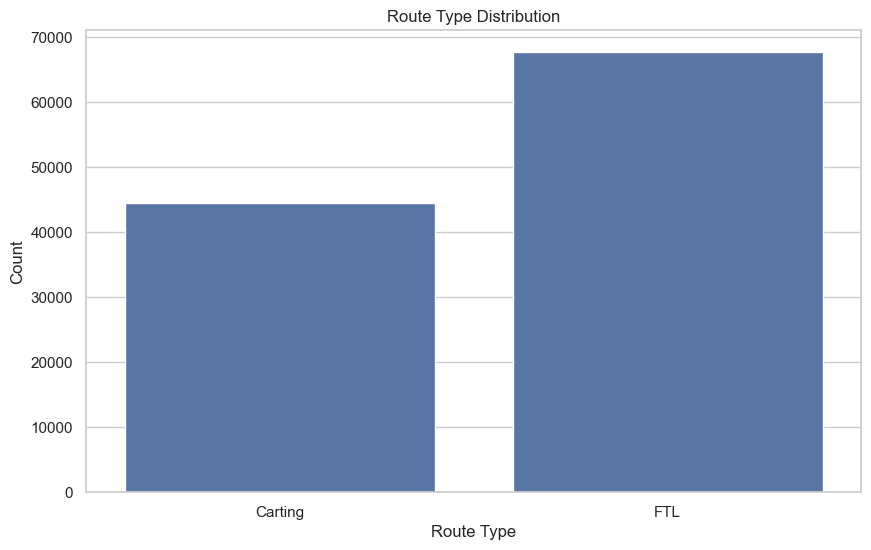

In [22]:
# Step 12.1: Route type distribution
if "route_type" in df.columns:
    plt.figure()
    sns.countplot(x="route_type", data=df)
    plt.title("Route Type Distribution")
    plt.xlabel("Route Type")
    plt.ylabel("Count")
    plt.show()


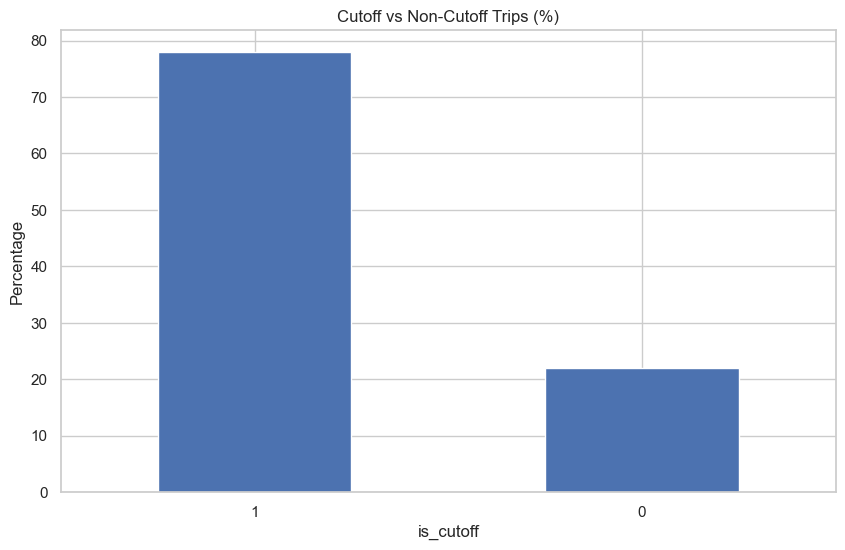

is_cutoff
1    77.97479
0    22.02521
Name: proportion, dtype: float64


In [23]:
# Step 12.2: Cutoff ratio
if "is_cutoff" in df.columns:
    cutoff_counts = df["is_cutoff"].value_counts(normalize=True) * 100
    cutoff_counts.plot(kind="bar")
    plt.title("Cutoff vs Non-Cutoff Trips (%)")
    plt.ylabel("Percentage")
    plt.xticks(rotation=0)
    plt.show()

    print(cutoff_counts)


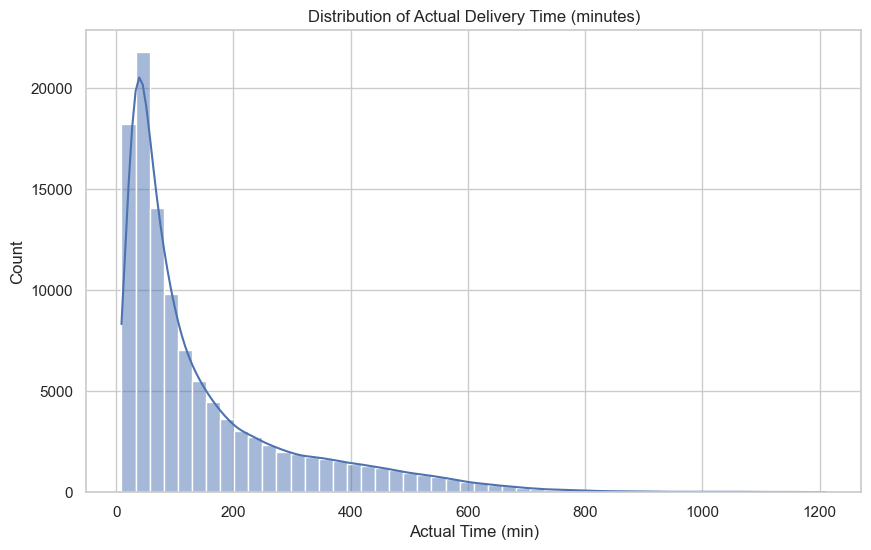

In [24]:
# Step 12.3: Distribution of actual_time
if "actual_time" in df.columns:
    plt.figure()
    sns.histplot(df["actual_time"], bins=50, kde=True)
    plt.title("Distribution of Actual Delivery Time (minutes)")
    plt.xlabel("Actual Time (min)")
    plt.ylabel("Count")
    plt.show()


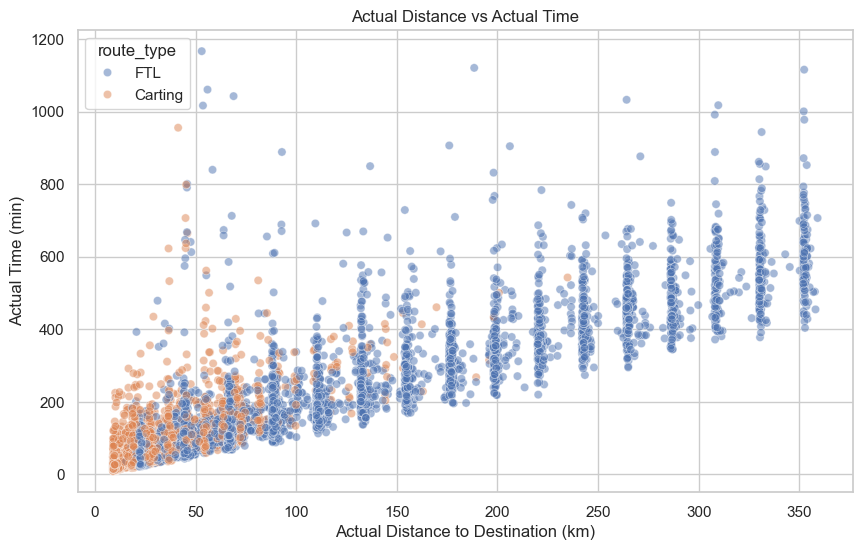

In [25]:
# Step 12.4: Distance vs Actual Time
if "actual_distance_to_destination" in df.columns and "actual_time" in df.columns:
    plt.figure()
    sns.scatterplot(
        data=df.sample(min(10000, len(df))),  # عشان مايبقاش تقيل لو الداتا كبيرة
        x="actual_distance_to_destination",
        y="actual_time",
        hue="route_type" if "route_type" in df.columns else None,
        alpha=0.5
    )
    plt.title("Actual Distance vs Actual Time")
    plt.xlabel("Actual Distance to Destination (km)")
    plt.ylabel("Actual Time (min)")
    plt.show()


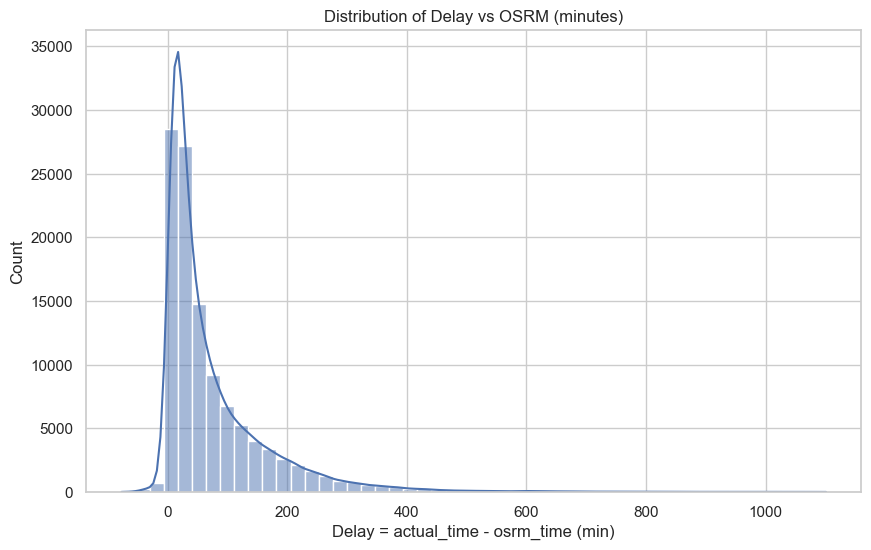

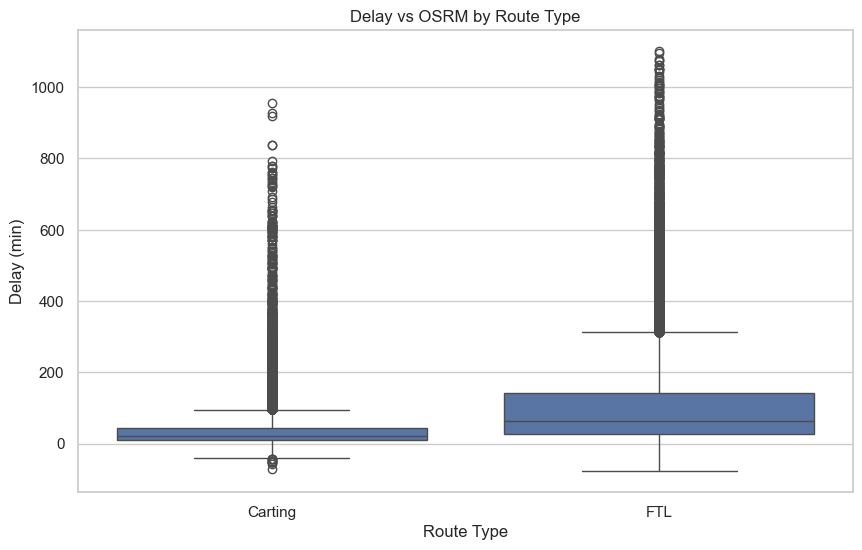

In [26]:
# Step 12.5: Delay vs OSRM distribution
if "delay_vs_osrm" in df.columns:
    plt.figure()
    sns.histplot(df["delay_vs_osrm"], bins=50, kde=True)
    plt.title("Distribution of Delay vs OSRM (minutes)")
    plt.xlabel("Delay = actual_time - osrm_time (min)")
    plt.ylabel("Count")
    plt.show()

    # Boxplot delay by route_type
    if "route_type" in df.columns:
        plt.figure()
        sns.boxplot(x="route_type", y="delay_vs_osrm", data=df)
        plt.title("Delay vs OSRM by Route Type")
        plt.xlabel("Route Type")
        plt.ylabel("Delay (min)")
        plt.show()


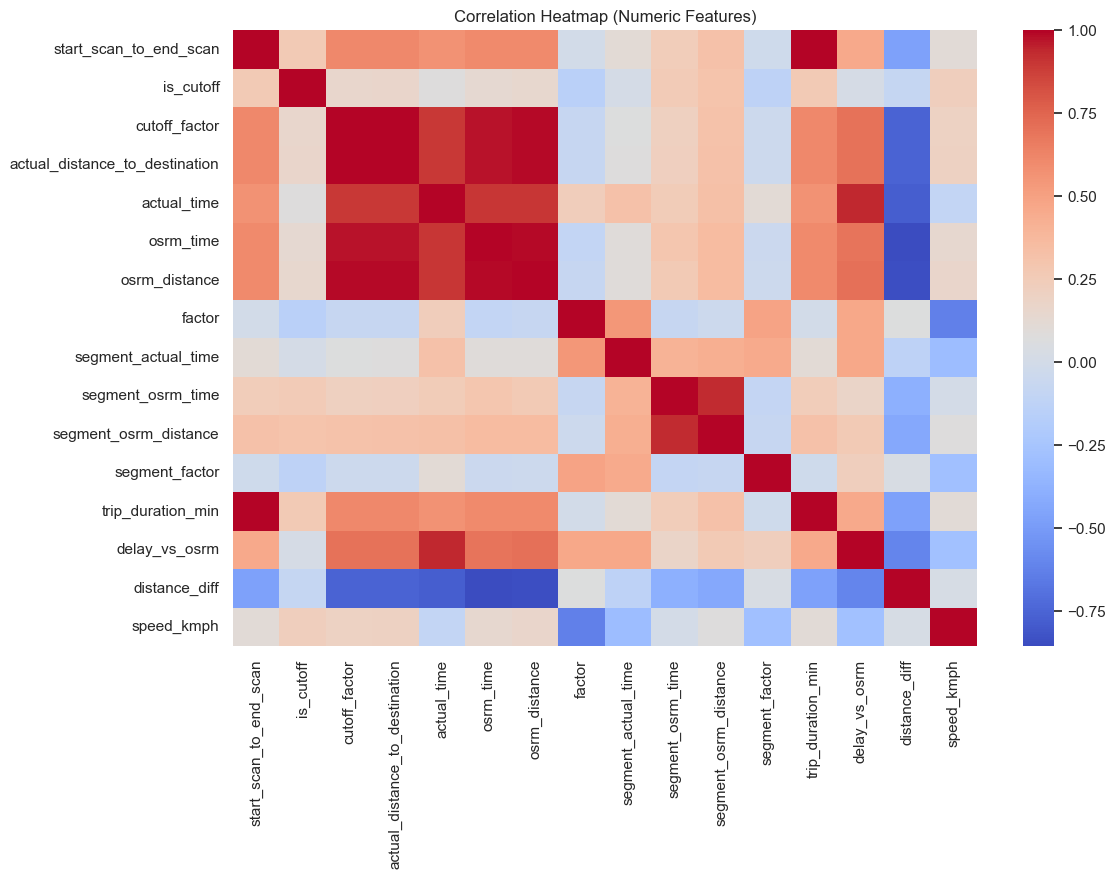

In [27]:
# Step 12.6: Correlation heatmap
num_cols_for_corr = [
    col for col in df.columns
    if df[col].dtype != "O" and df[col].dtype.name != "datetime64[ns]"
]

corr = df[num_cols_for_corr].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [28]:
# Step 13: Save cleaned data
df.to_csv("delhivery_clean.csv", index=False)
print("Cleaned dataset saved as delhivery_clean.csv")


Cleaned dataset saved as delhivery_clean.csv


In [29]:
!pip install streamlit plotly


In [33]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px

# ---------- Page Config ----------
st.set_page_config(
    page_title="Delhivery Logistics Dashboard",
    page_icon="🚚",
    layout="wide"
)

# ---------- Load Data ----------
@st.cache_data
def load_data():
    # هنا نفترض إنك حفظت الداتا بعد الـ cleaning باسم ده
    df = pd.read_csv("delhivery_clean.csv")
    
    # تأكد إن أعمدة الوقت متحوّلة لـ datetime
    time_cols = ["trip_creation_time", "od_start_time", "od_end_time", "cutoff_timestamp"]
    for col in time_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")
    return df

df = load_data()

# ---------- Custom Style ----------
st.markdown("""
    <style>
    .big-title {
        font-size: 32px !important;
        font-weight: 700 !important;
    }
    .sub-title {
        font-size: 18px !important;
        color: #555555 !important;
    }
    </style>
""", unsafe_allow_html=True)

st.markdown('<p class="big-title">🚚 Delhivery Logistics Performance Dashboard</p>', unsafe_allow_html=True)
st.markdown('<p class="sub-title">تحليل كامل لأداء الرحلات، التأخير، السرعة، والمسافات الفعلية مقابل OSRM</p>', unsafe_allow_html=True)
st.markdown("---")

# ---------- Sidebar Filters ----------
st.sidebar.header("🔎 Filters")

# Route type filter
route_types = df["route_type"].dropna().unique().tolist()
selected_route_types = st.sidebar.multiselect(
    "Route Type",
    options=route_types,
    default=route_types
)

# Cutoff filter
cutoff_option = st.sidebar.selectbox(
    "Cutoff Status",
    options=["All", "Cutoff Only", "Non-Cutoff"]
)

# Date range filter (based on od_start_time)
if "od_start_time" in df.columns:
    min_date = df["od_start_time"].min()
    max_date = df["od_start_time"].max()
    date_range = st.sidebar.date_input(
        "Trip Start Date Range",
        value=(min_date, max_date),
        min_value=min_date,
        max_value=max_date
    )
else:
    date_range = None

# Apply filters
filtered_df = df.copy()

if selected_route_types:
    filtered_df = filtered_df[filtered_df["route_type"].isin(selected_route_types)]

if cutoff_option == "Cutoff Only":
    filtered_df = filtered_df[filtered_df["is_cutoff"] == 1]
elif cutoff_option == "Non-Cutoff":
    filtered_df = filtered_df[filtered_df["is_cutoff"] == 0]

if date_range and "od_start_time" in filtered_df.columns:
    start_date, end_date = date_range
    filtered_df = filtered_df[
        (filtered_df["od_start_time"] >= pd.to_datetime(start_date)) &
        (filtered_df["od_start_time"] <= pd.to_datetime(end_date))
    ]

st.sidebar.markdown("---")
st.sidebar.write(f"Number of trips after filters: **{filtered_df.shape[0]}**")

# ---------- KPIs (Top Metrics) ----------
st.subheader("📌 Key Performance Indicators")

col1, col2, col3, col4 = st.columns(4)

with col1:
    total_trips = filtered_df.shape[0]
    st.metric("Total Trips", f"{total_trips:,}")

with col2:
    if "speed_kmph" in filtered_df.columns:
        avg_speed = filtered_df["speed_kmph"].mean()
        st.metric("Avg Speed (km/h)", f"{avg_speed:.2f}")
    else:
        st.metric("Avg Speed (km/h)", "N/A")

with col3:
    if "delay_vs_osrm" in filtered_df.columns:
        avg_delay = filtered_df["delay_vs_osrm"].mean()
        st.metric("Avg Delay vs OSRM (min)", f"{avg_delay:.1f}")
    else:
        st.metric("Avg Delay vs OSRM (min)", "N/A")

with col4:
    if "is_cutoff" in filtered_df.columns:
        cutoff_ratio = (filtered_df["is_cutoff"].mean()) * 100
        st.metric("Cutoff Trips (%)", f"{cutoff_ratio:.2f}%")
    else:
        st.metric("Cutoff Trips (%)", "N/A")

st.markdown("---")

# ---------- Row 1 Charts ----------
left_col, right_col = st.columns(2)

with left_col:
    st.subheader("⏱ Distribution of Trip Duration (min)")
    if "trip_duration_min" in filtered_df.columns:
        fig = px.histogram(
            filtered_df,
            x="trip_duration_min",
            nbins=50,
            title="Trip Duration Distribution",
        )
        fig.update_layout(xaxis_title="Trip Duration (min)", yaxis_title="Count")
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.info("trip_duration_min column not found in the dataset.")

with right_col:
    st.subheader("🚚 Delay vs OSRM by Route Type")
    if "delay_vs_osrm" in filtered_df.columns and "route_type" in filtered_df.columns:
        fig = px.box(
            filtered_df,
            x="route_type",
            y="delay_vs_osrm",
            points="suspectedoutliers",
            title="Delay vs OSRM (min) by Route Type"
        )
        fig.update_layout(xaxis_title="Route Type", yaxis_title="Delay (min)")
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.info("delay_vs_osrm or route_type column not found.")

# ---------- Row 2 Charts ----------
left_col2, right_col2 = st.columns(2)

with left_col2:
    st.subheader("📍 Top Source Centers by Trip Count")
    if "source_center" in filtered_df.columns:
        # نجيب عدد الرحلات لكل source_center
        top_sources = (
            filtered_df["source_center"]
            .value_counts()
            .head(10)
        )

        # نرجّعه DataFrame بأسماء أعمدة واضحة
        top_sources = (
            top_sources
            .rename_axis("source_center")          # اسم الاندكس
            .reset_index(name="trip_count")        # العمود الجديد لعدد الرحلات
        )

        # لو حابب تتأكد:
        # st.write(top_sources.head())

        fig = px.bar(
            top_sources,
            x="source_center",
            y="trip_count",
            title="Top 10 Source Centers",
        )
        fig.update_layout(
            xaxis_title="Source Center",
            yaxis_title="Number of Trips"
        )
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.info("source_center column not found.")


with right_col2:
    st.subheader("📏 Distance vs Actual Time")
    if "actual_distance_to_destination" in filtered_df.columns and "actual_time" in filtered_df.columns:
        sample_df = filtered_df.sample(min(10000, len(filtered_df)), random_state=42)
        fig = px.scatter(
            sample_df,
            x="actual_distance_to_destination",
            y="actual_time",
            color="route_type" if "route_type" in sample_df.columns else None,
            title="Actual Distance vs Actual Time",
            opacity=0.6,
        )
        fig.update_layout(
            xaxis_title="Actual Distance to Destination (km)",
            yaxis_title="Actual Time (min)"
        )
        st.plotly_chart(fig, use_container_width=True)
    else:
        st.info("Distance or time columns not found.")

# ---------- Raw Data ----------
st.markdown("---")
st.subheader("📄 Raw Data (Filtered)")
st.dataframe(filtered_df.head(500))


Overwriting app.py


In [ ]:
!streamlit run app.py
